In [2]:
import requests
from bs4 import BeautifulSoup

### 무비챠트의 공지사항을 크롤링한다.
* 1) 무비챠트 영화 사이트로 이동한다.
        url주소 : https://www.moviechart.co.kr/support/notice?page=1
* 2) get 방식으로 호출하여 데이터를 크롤링한다.        
* 3) page=xx 파라미터에 값을 변화하여 처리한다.

In [3]:
url_main = "https://www.moviechart.co.kr"
url_sub = "/support/notice?page=1"
url = url_main+url_sub
print(url)
req=requests.get(url)

print("status code :", req.status_code)


https://www.moviechart.co.kr/support/notice?page=1
status code : 200


In [4]:
html = req.text
soup = BeautifulSoup(html, 'html.parser')

soup

<!DOCTYPE html>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<!-- 익스 엣지 메타테그 -->
<meta content="IE=edge" http-equiv="X-UA-Compatible">
<!-- 모바일, 반응형 적용시 -->
<meta content="nZ0b7UHZmj75dj8xGZeooc71Uv-X0aFVxS51C9lp9ms" name="google-site-verification"/>
<meta content="e616afda98033d0098a47615c485becfd2a2d479" name="naver-site-verification"/>
<title>무비차트</title>
<meta content="영화순위, 예매율, 누적관객 정보, 영화예매, 무료영화예매권, 경품프로모션 제휴" name="description"/>
<meta content="" property="mpts:user_id">
<!-- css -->
<link href="/assets/css/common.css" rel="stylesheet" type="text/css"/>
<link href="/assets/css/jcarousel.basic2.css" rel="stylesheet">
<link href="/assets/css/jquery.ui.css" rel="stylesheet"/>
<link href="/assets/css/custom.css" rel="stylesheet" type="text/css"/>
<!-- jQuery -->
<script src="/assets/js/jquery-1.11.2.min.js"></script>
<script src="/assets/js/jquery.easing.1.3.js"></script>
<script src="/assets/js/jquery-ui-1.9.2.min.js"></script>
<script src="/assets/js/custom.js?ver=2"></scrip

### 태그 분석 : 네이버  공지사항 추출하고자 하는 데이터 부분에 대한 태그 분석
* 1) table태그 범위 안에 추출하고자 하는 전체 데이터가 다 있음(분석 : div class="tableType02")
   * 사용 노드 : div.tableType02 > table > tbody > tr 에 추출하고자 하는 데이터가 있다 
* 2) 공지사항 제목 : td > a 태그의 URL 및 텍스트 사용
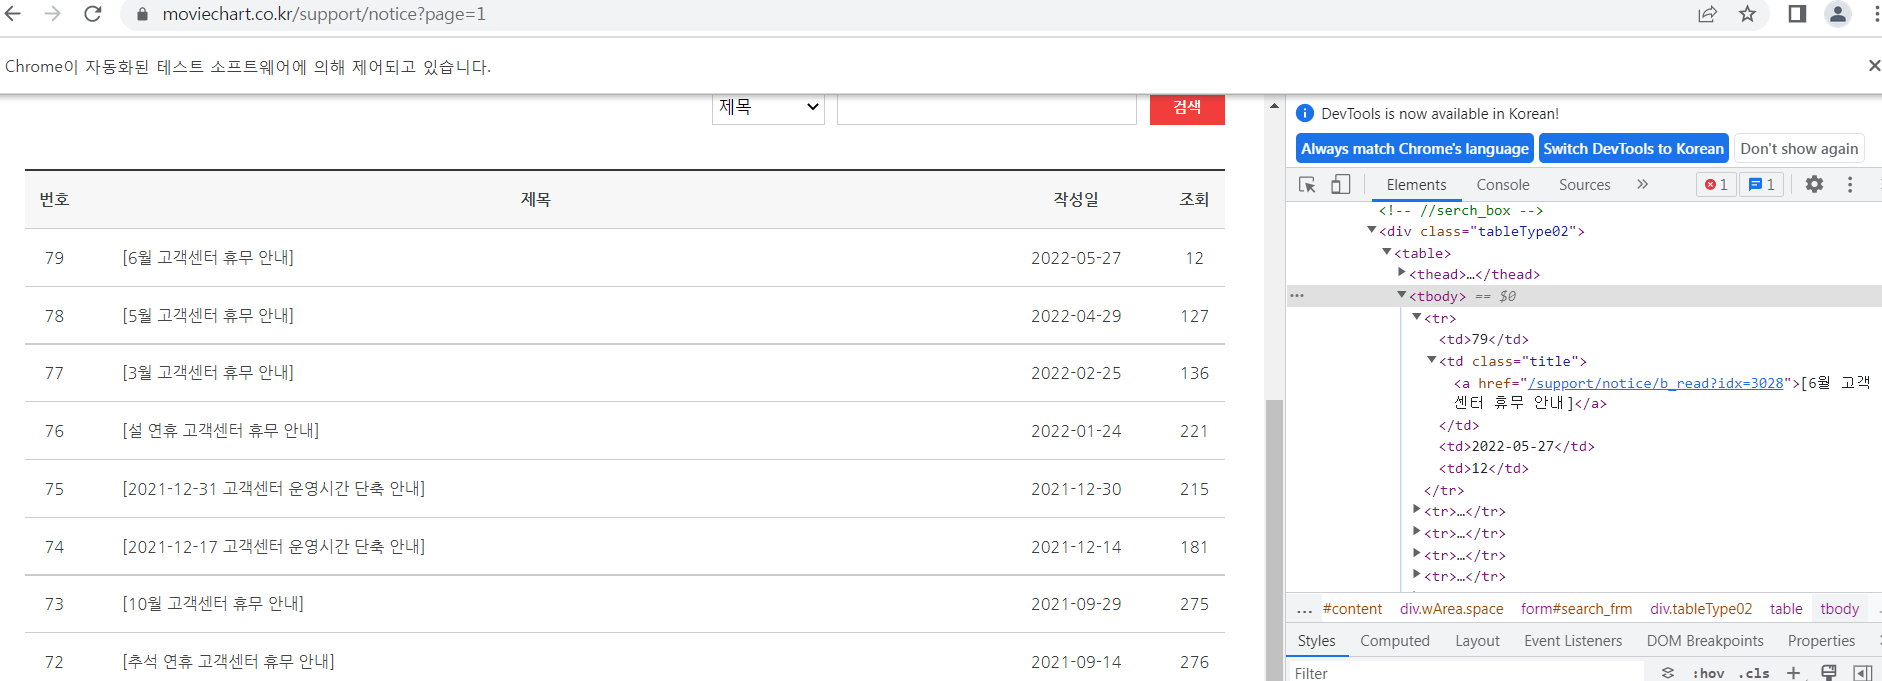

In [7]:
url_main = "https://www.moviechart.co.kr"
url_sub = "/support/notice?page=1" # {}이 부분은 반복문에서 페이지를 호출할 때 페이지 번호 대입
url = url_main+url_sub

req=requests.get(url)
print("status code :", req.status_code)

status code : 200


In [5]:
if req.status_code == 200 : 
    html = req.content
#    soup = BeautifulSoup(html, 'html.parser')
    soup = BeautifulSoup(req.content)
    tdlist = soup.select("div.tableType02 > table > tbody > tr")
    print(len(tdlist))
#    print(tdlist)
#    print(soup)
    for x in tdlist:
        mtitle = x.select_one("td>a").text.strip()
        mhref  = x.select_one("td>a").get("href")
        mhref1  = x.select_one("td>a").attrs["href"]

        print(mtitle, mhref, mhref1, sep="^==^")
        print("="*100)
    
else:
    print("네이버영화감상 사이트에서 정상적으로 호출되지 않았습니다.")

10
[6월 고객센터 휴무 안내]^==^/support/notice/b_read?idx=3028^==^/support/notice/b_read?idx=3028
[5월 고객센터 휴무 안내]^==^/support/notice/b_read?idx=2896^==^/support/notice/b_read?idx=2896
[3월 고객센터 휴무 안내]^==^/support/notice/b_read?idx=2828^==^/support/notice/b_read?idx=2828
[설 연휴 고객센터 휴무 안내]^==^/support/notice/b_read?idx=2743^==^/support/notice/b_read?idx=2743
[2021-12-31 고객센터 운영시간 단축 안내]^==^/support/notice/b_read?idx=2699^==^/support/notice/b_read?idx=2699
[2021-12-17 고객센터 운영시간 단축 안내]^==^/support/notice/b_read?idx=2665^==^/support/notice/b_read?idx=2665
[10월 고객센터 휴무 안내]^==^/support/notice/b_read?idx=2531^==^/support/notice/b_read?idx=2531
[추석 연휴 고객센터 휴무 안내]^==^/support/notice/b_read?idx=2499^==^/support/notice/b_read?idx=2499
[광복절 대체 휴일 고객센터 휴무 안내]^==^/support/notice/b_read?idx=2424^==^/support/notice/b_read?idx=2424
[수도권 사회적 거리두기 4단계 격상으로 인한 이용 제한 안내]^==^/support/notice/b_read?idx=2328^==^/support/notice/b_read?idx=2328


### 태그 분석 : 네이버 평점 리뷰 부분의 추출하고자 하는 데이터 부분에 대한 태그 분석
### 전체 페이지 조회하기
#### 페이지를 바로 넘기는 경우 크롤링이 막힐 수 있으므로 deley타임을 주어야 함
* 1) table태그 범위 안에 추출하고자 하는 전체 데이터가 다 있음(분석 : table cellspacing="0" class="list_netizen")
   * 사용 노드 : table.list_netizen > tbody > tr > td.title 에 추출하고자 하는 데이터가 있다 
* 2) 영화 제목 : a class="movie color_b" 이곳의 텍스트 사용
   * 영화제목 링크는 생대경로로 되어 있음(href="?st=mcode&amp;sword=205614&amp;target=after")
* 3) 평점 : div class="list_netizen_score" 의 텍스트
* 4) 댓글 : br 태그 
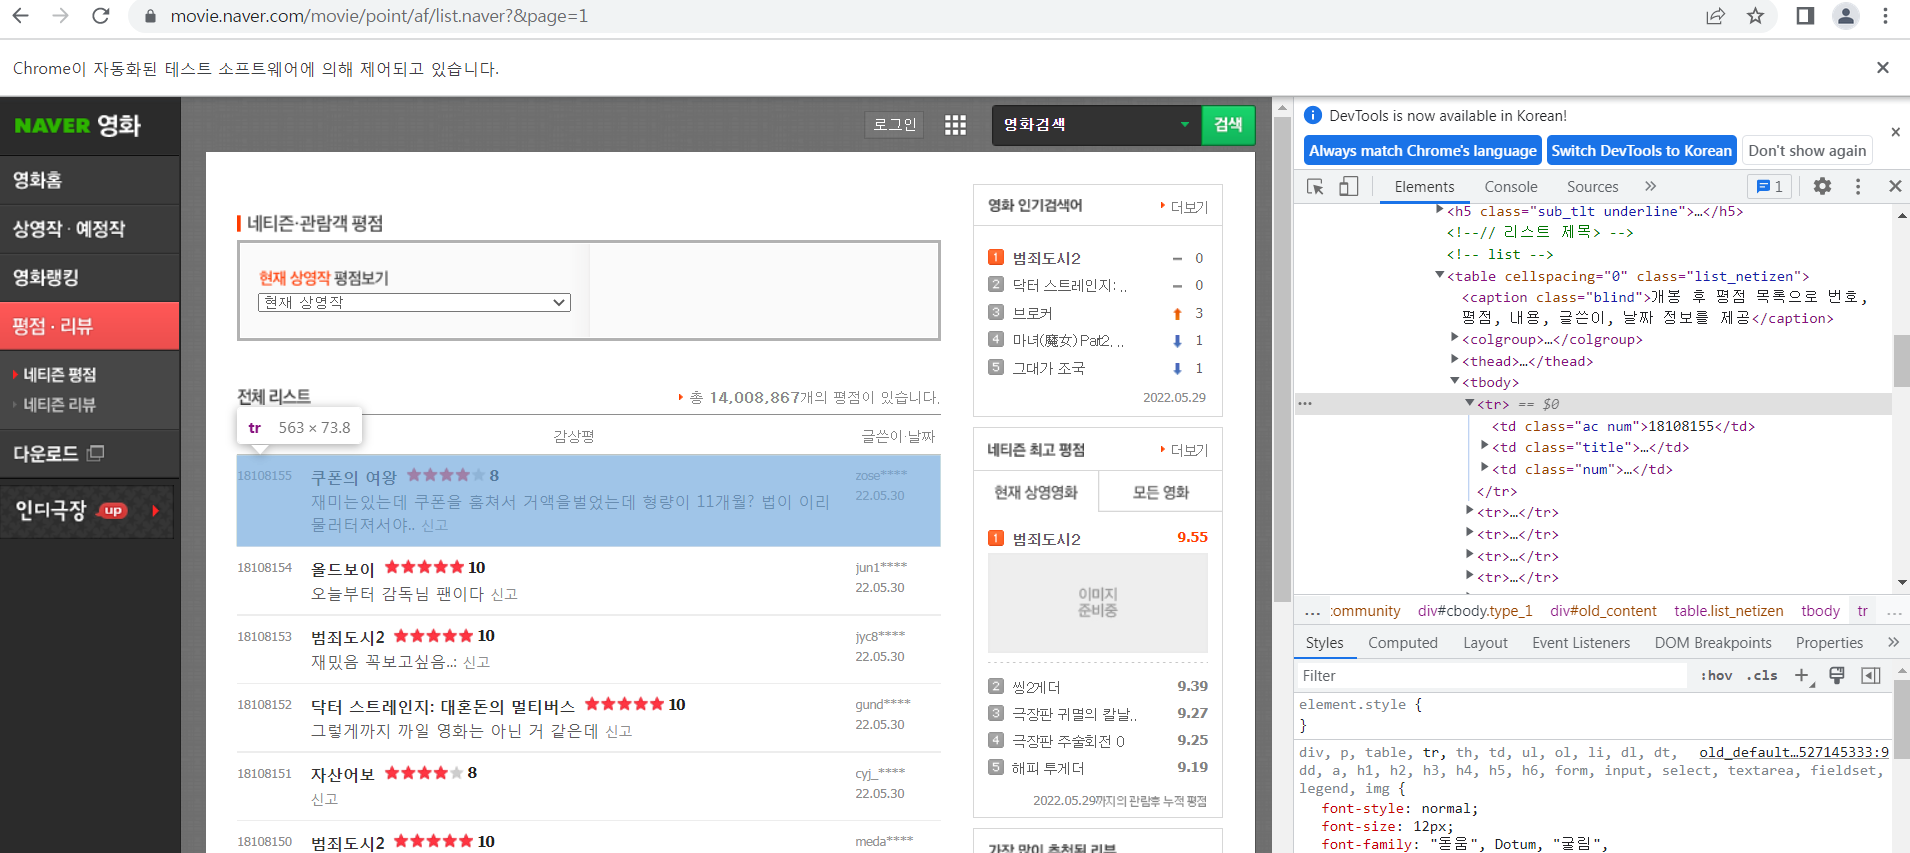

In [4]:
import requests
from bs4 import BeautifulSoup
import time
import random

In [5]:
url_main = "https://movie.naver.com/"
url_sub = "/movie/point/af/list.naver?&page={}" # {}이 부분은 반복문에서 페이지를 호출할 때 페이지 번호 대입
url = url_main+url_sub

list_comment = []
pagerange = 3

In [ ]:
for pagenm in range(1,pagerange+1):
    url = url.format(pagenm)
    req=requests.get(url)
    print("status code :", req.status_code, "==", url)

    if req.status_code == 200 : 
        html = req.content
    #    soup = BeautifulSoup(html, 'html.parser')
        soup = BeautifulSoup(req.content)
        tdlist = soup.select("table.list_netizen > tbody > tr")
        print(len(tdlist))
        #print(tdlist)
        #print(soup)
        for x in tdlist:
            mtitle = x.select_one("a.movie").text.strip()
            mlink = x.select_one("a.movie").get("href")
            mscore = x.select_one("div.list_netizen_score > em").text.strip()
            mcomment = x.select_one("br").next_sibling.strip()
            list_comment.append((str(pagenm)+"page", mtitle, mlink, mscore, mcomment))
        interval = round(random.uniform(0.2,1.2),2)
        time.sleep(interval)
    else:
        print("네이버영화감상 사이트에서 정상적으로 호출되지 않았습니다.")    

status code : 200 == https://movie.naver.com//movie/point/af/list.naver?&page=1
10
status code : 200 == https://movie.naver.com//movie/point/af/list.naver?&page=1
10
status code : 200 == https://movie.naver.com//movie/point/af/list.naver?&page=1
10


In [44]:
print(list_comment)

[('1page', '올드보이', '?st=mcode&sword=36944&target=after', '10', '오늘부터 감독님 팬이다'), ('1page', '범죄도시2', '?st=mcode&sword=192608&target=after', '10', '재밌음 꼭보고싶음..:'), ('1page', '닥터 스트레인지: 대혼돈의 멀티버스', '?st=mcode&sword=182016&target=after', '10', '그렇게까지 까일 영화는 아닌 거 같은데'), ('1page', '자산어보', '?st=mcode&sword=189075&target=after', '8', ''), ('1page', '범죄도시2', '?st=mcode&sword=192608&target=after', '10', '졸잼 그냥 무조건 보세요'), ('1page', '안녕하세요', '?st=mcode&sword=203461&target=after', '10', ''), ('1page', '범죄도시2', '?st=mcode&sword=192608&target=after', '10', '그냥 쥰내 재밌음 이거 별 5개 미만으로 준다?실제로 마동석한테 맞아서 원한있는 사람이거나 인격 결여된 사람임'), ('1page', '범죄도시2', '?st=mcode&sword=192608&target=after', '9', ''), ('1page', '범죄도시2', '?st=mcode&sword=192608&target=after', '10', '후속편 성공 사례  최고였다.'), ('1page', '범죄도시2', '?st=mcode&sword=192608&target=after', '1', '주변에서 하도 재밌다고 해서 기대가 너무 컸나봐요마동석 액션은 식상하고 악역도 장첸이 한수 위였어요'), ('2page', '올드보이', '?st=mcode&sword=36944&target=after', '10', '오늘부터 감독님 팬이다'), ('2page', '범죄도시2', '?st=mcode&sw

### 파일로 저장하기
* 한글깨짐 방지 : to_csv 사용시 encoding = "euc-kr" 사용하여 한글깨짐 방지, utf-8사용하면 한글 깨짐 발생할 수 있음

In [20]:
import pandas as pd

In [21]:
df = pd.DataFrame(list_comment, columns = ["no","영화제목", "링크주소", "평점", "댓글내용"])

df.to_csv("naver_movie.csv", encoding="euc-kr", index=False)